In [2]:
%load_ext rpy2.ipython

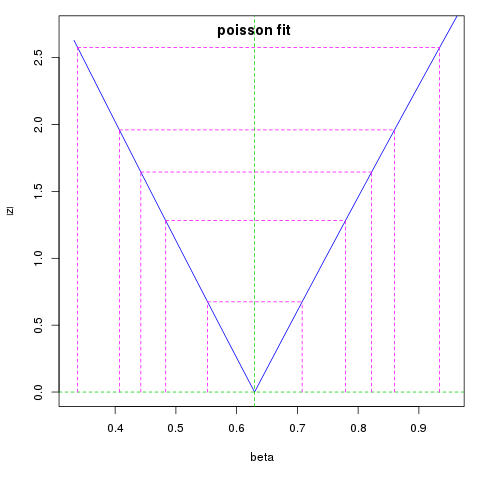

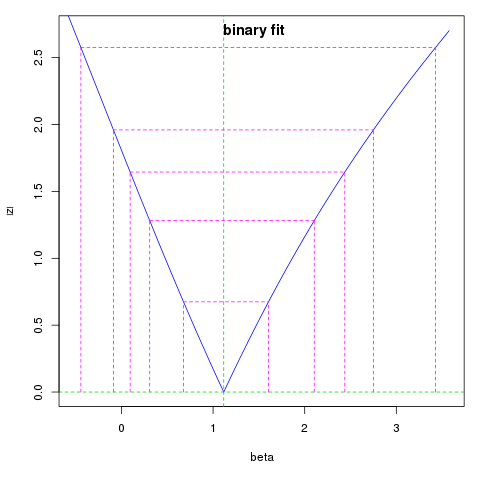

In [3]:
%%R
library(stats4)
data <- data.frame(j=c(1,2,3,4,5,6,7,8,9,10,11,12), 
                   cj=c(0.46,1.42,1.95,1.65,0.72,0.04,0.25,1.15,1.91,1.84,1.00,0.16),
                   yj=c(0,0,6,3,3,2,0,1,3,4,2,0),
                   zj=c(0,0,1,1,1,1,0,1,1,1,1,0)
                  )

LL1 <- function(mu_0, beta) {
     mu_j = mu_0*exp(beta*data$cj)
     -sum(data$yj*log(mu_j) - mu_j)
}

fit1 <- mle(LL1, start = list(mu_0 = 0.1, beta=0.1))
plot(profile(fit1, which=2), main="")
title("poisson fit")

LL2 <- function(mu_0, beta) {
     mu_j = mu_0*exp(beta*data$cj)
     -sum(data$zj*log(1 - exp(-mu_j)) + (1 - data$zj)*log(exp(-mu_j)))
}
fit2 <- mle(LL2, start = list(mu_0 = 0.1, beta=0.1))
plot(profile(fit2, which=2), main="")
title("binary fit")

## comment

The poisson model fit has much tighter confidence intervals (look at the axes, the second magenta line from the minimum is 9